### Oasis Infobyte Internship Task 2
### UNEMPLOYMENT ANALYSIS WITH PYTHON

#### About the Dataset
The dataset 'Unemployment In India' is taken from kaggle.The story behind this datasets is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19. This Dataset contains two sub datasets.

1. Unemployment in India
2. Unemployment_Rate_upto_11_2020

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data profiling

In [101]:
df = pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [102]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.shape

(768, 7)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [105]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [106]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [107]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

#### Data cleaning

In [108]:
df.duplicated().sum()

27

In [109]:
df.drop_duplicates(inplace=True)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [110]:
df.shape

(741, 7)

In [111]:
df.isna().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

In [112]:
df.dropna(inplace=True)
df.isnull().any()

Region                                      False
 Date                                       False
 Frequency                                  False
 Estimated Unemployment Rate (%)            False
 Estimated Employed                         False
 Estimated Labour Participation Rate (%)    False
Area                                        False
dtype: bool

In [113]:
df['Date']=pd.to_datetime(df[' Date'])
df.dtypes

Region                                              object
 Date                                               object
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                float64
 Estimated Labour Participation Rate (%)           float64
Area                                                object
Date                                        datetime64[ns]
dtype: object

In [114]:
df['Year']=df['Date'].dt.year
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Year
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31,2019
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30,2019
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31,2019
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31,2019
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30,2019


In [115]:
df.drop([' Date','Date'],axis = 1, inplace=True)

In [116]:
df.columns = df.columns.str.strip()
df.columns

Index(['Region', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Year'],
      dtype='object')

In [117]:
df.dtypes

Region                                      object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
Year                                         int32
dtype: object

In [118]:
df['Frequency'].replace(' Monthly','Monthly',inplace=True)
df['Frequency'].value_counts() 

Frequency
Monthly    740
Name: count, dtype: int64

In [119]:
catg_cols = df.select_dtypes(include='object').columns
print(catg_cols)
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['Region', 'Frequency', 'Area'], dtype='object')
Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Year'],
      dtype='object')


#### Data visualization

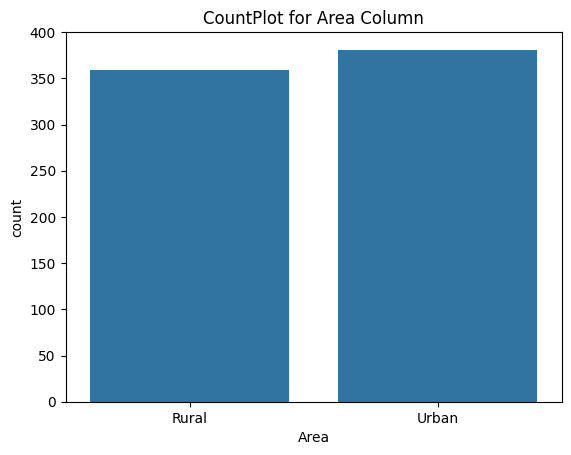

In [120]:
sns.countplot(x=df['Area'])
plt.title('CountPlot for Area Column')
plt.show()

In [121]:
# Showing Percentage Distribution of Average Estimated Unemployment Rate Area wise
d1 = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
d1

Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate (%), dtype: float64

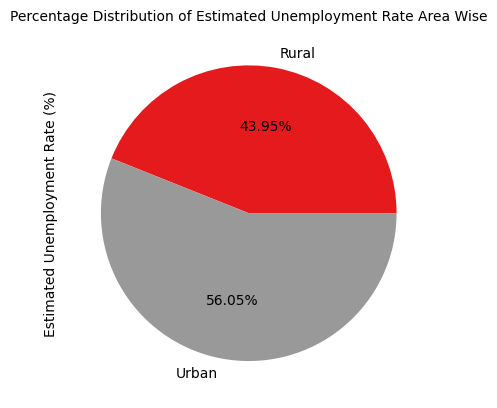

In [122]:
d1.plot(kind='pie',autopct='%.2f%%',cmap='Set1')
plt.title('Percentage Distribution of Estimated Unemployment Rate Area Wise',size=10)
plt.show()

In [123]:
d2 = df.groupby('Area')['Estimated Labour Participation Rate (%)'].mean()
d2

Area
Rural    44.464819
Urban    40.901365
Name: Estimated Labour Participation Rate (%), dtype: float64

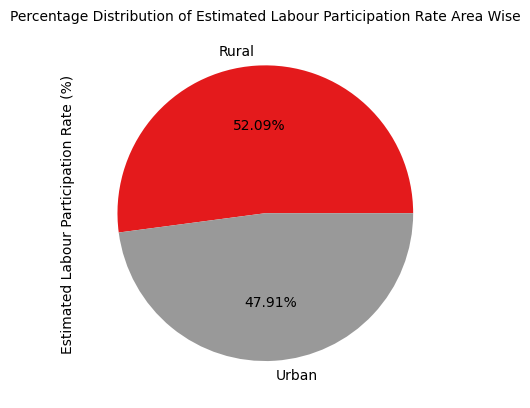

In [124]:
d2.plot(kind='pie',autopct='%.2f%%',cmap='Set1')
plt.title('Percentage Distribution of Estimated Labour Participation Rate Area Wise',size=10)
plt.show()

In [125]:
d3 = df.groupby('Area')['Estimated Employed'].mean()
d3

Area
Rural    1.019285e+07
Urban    4.388626e+06
Name: Estimated Employed, dtype: float64

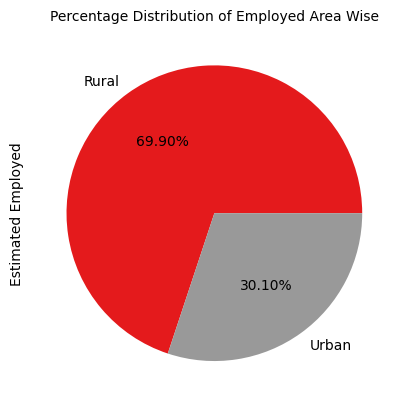

In [126]:
d3.plot(kind='pie',autopct='%.2f%%',cmap='Set1')
plt.title('Percentage Distribution of Employed Area Wise',size=10)
plt.show()

In [127]:
d4 = df['Year'].value_counts()
d4

Year
2019    430
2020    310
Name: count, dtype: int64

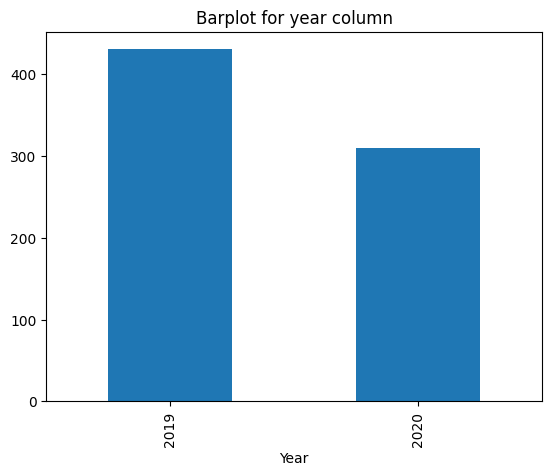

In [128]:
d4.plot(kind='bar')
plt.title('Barplot for year column')
plt.show()

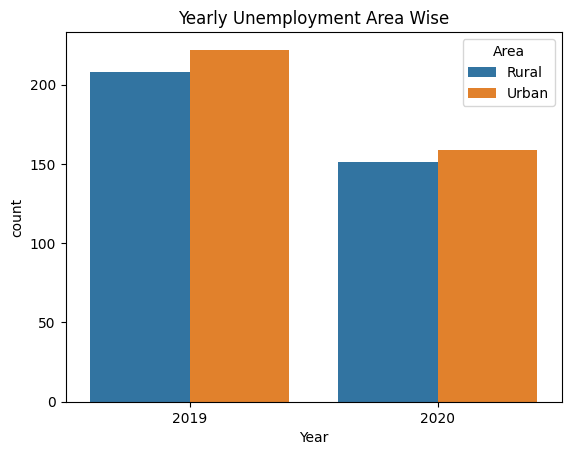

In [129]:
sns.countplot(x=df['Year'],hue=df['Area'])
plt.title('Yearly Unemployment Area Wise')
plt.show()

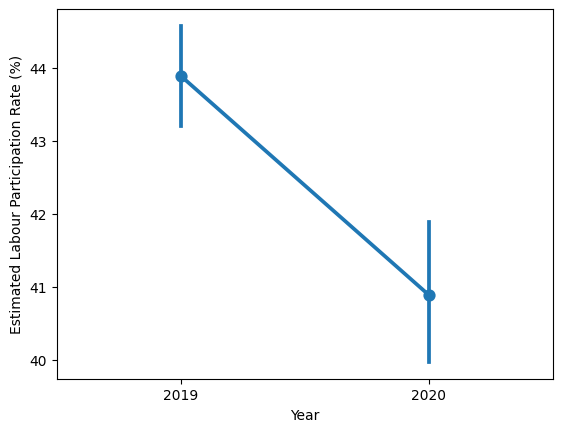

In [130]:
sns.pointplot(y=df['Estimated Labour Participation Rate (%)'],x=df['Year'])
plt.show()

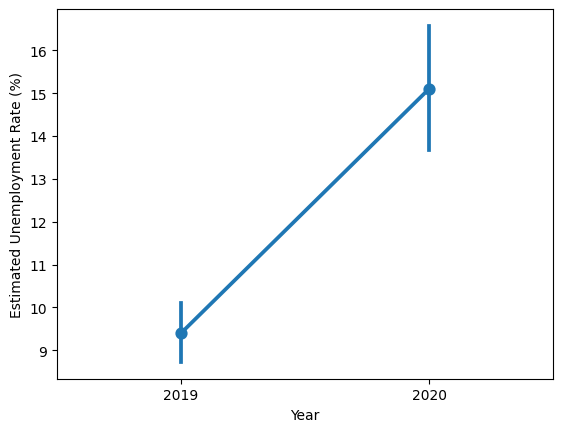

In [131]:
sns.pointplot(y=df['Estimated Unemployment Rate (%)'],x=df['Year'])
plt.show()

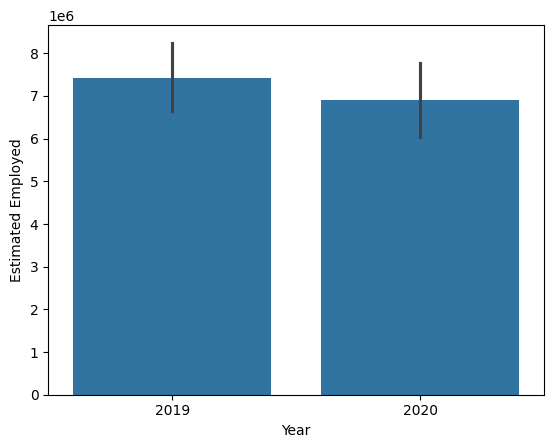

In [132]:
sns.barplot(y=df['Estimated Employed'],x=df['Year'])
plt.show()

In [133]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

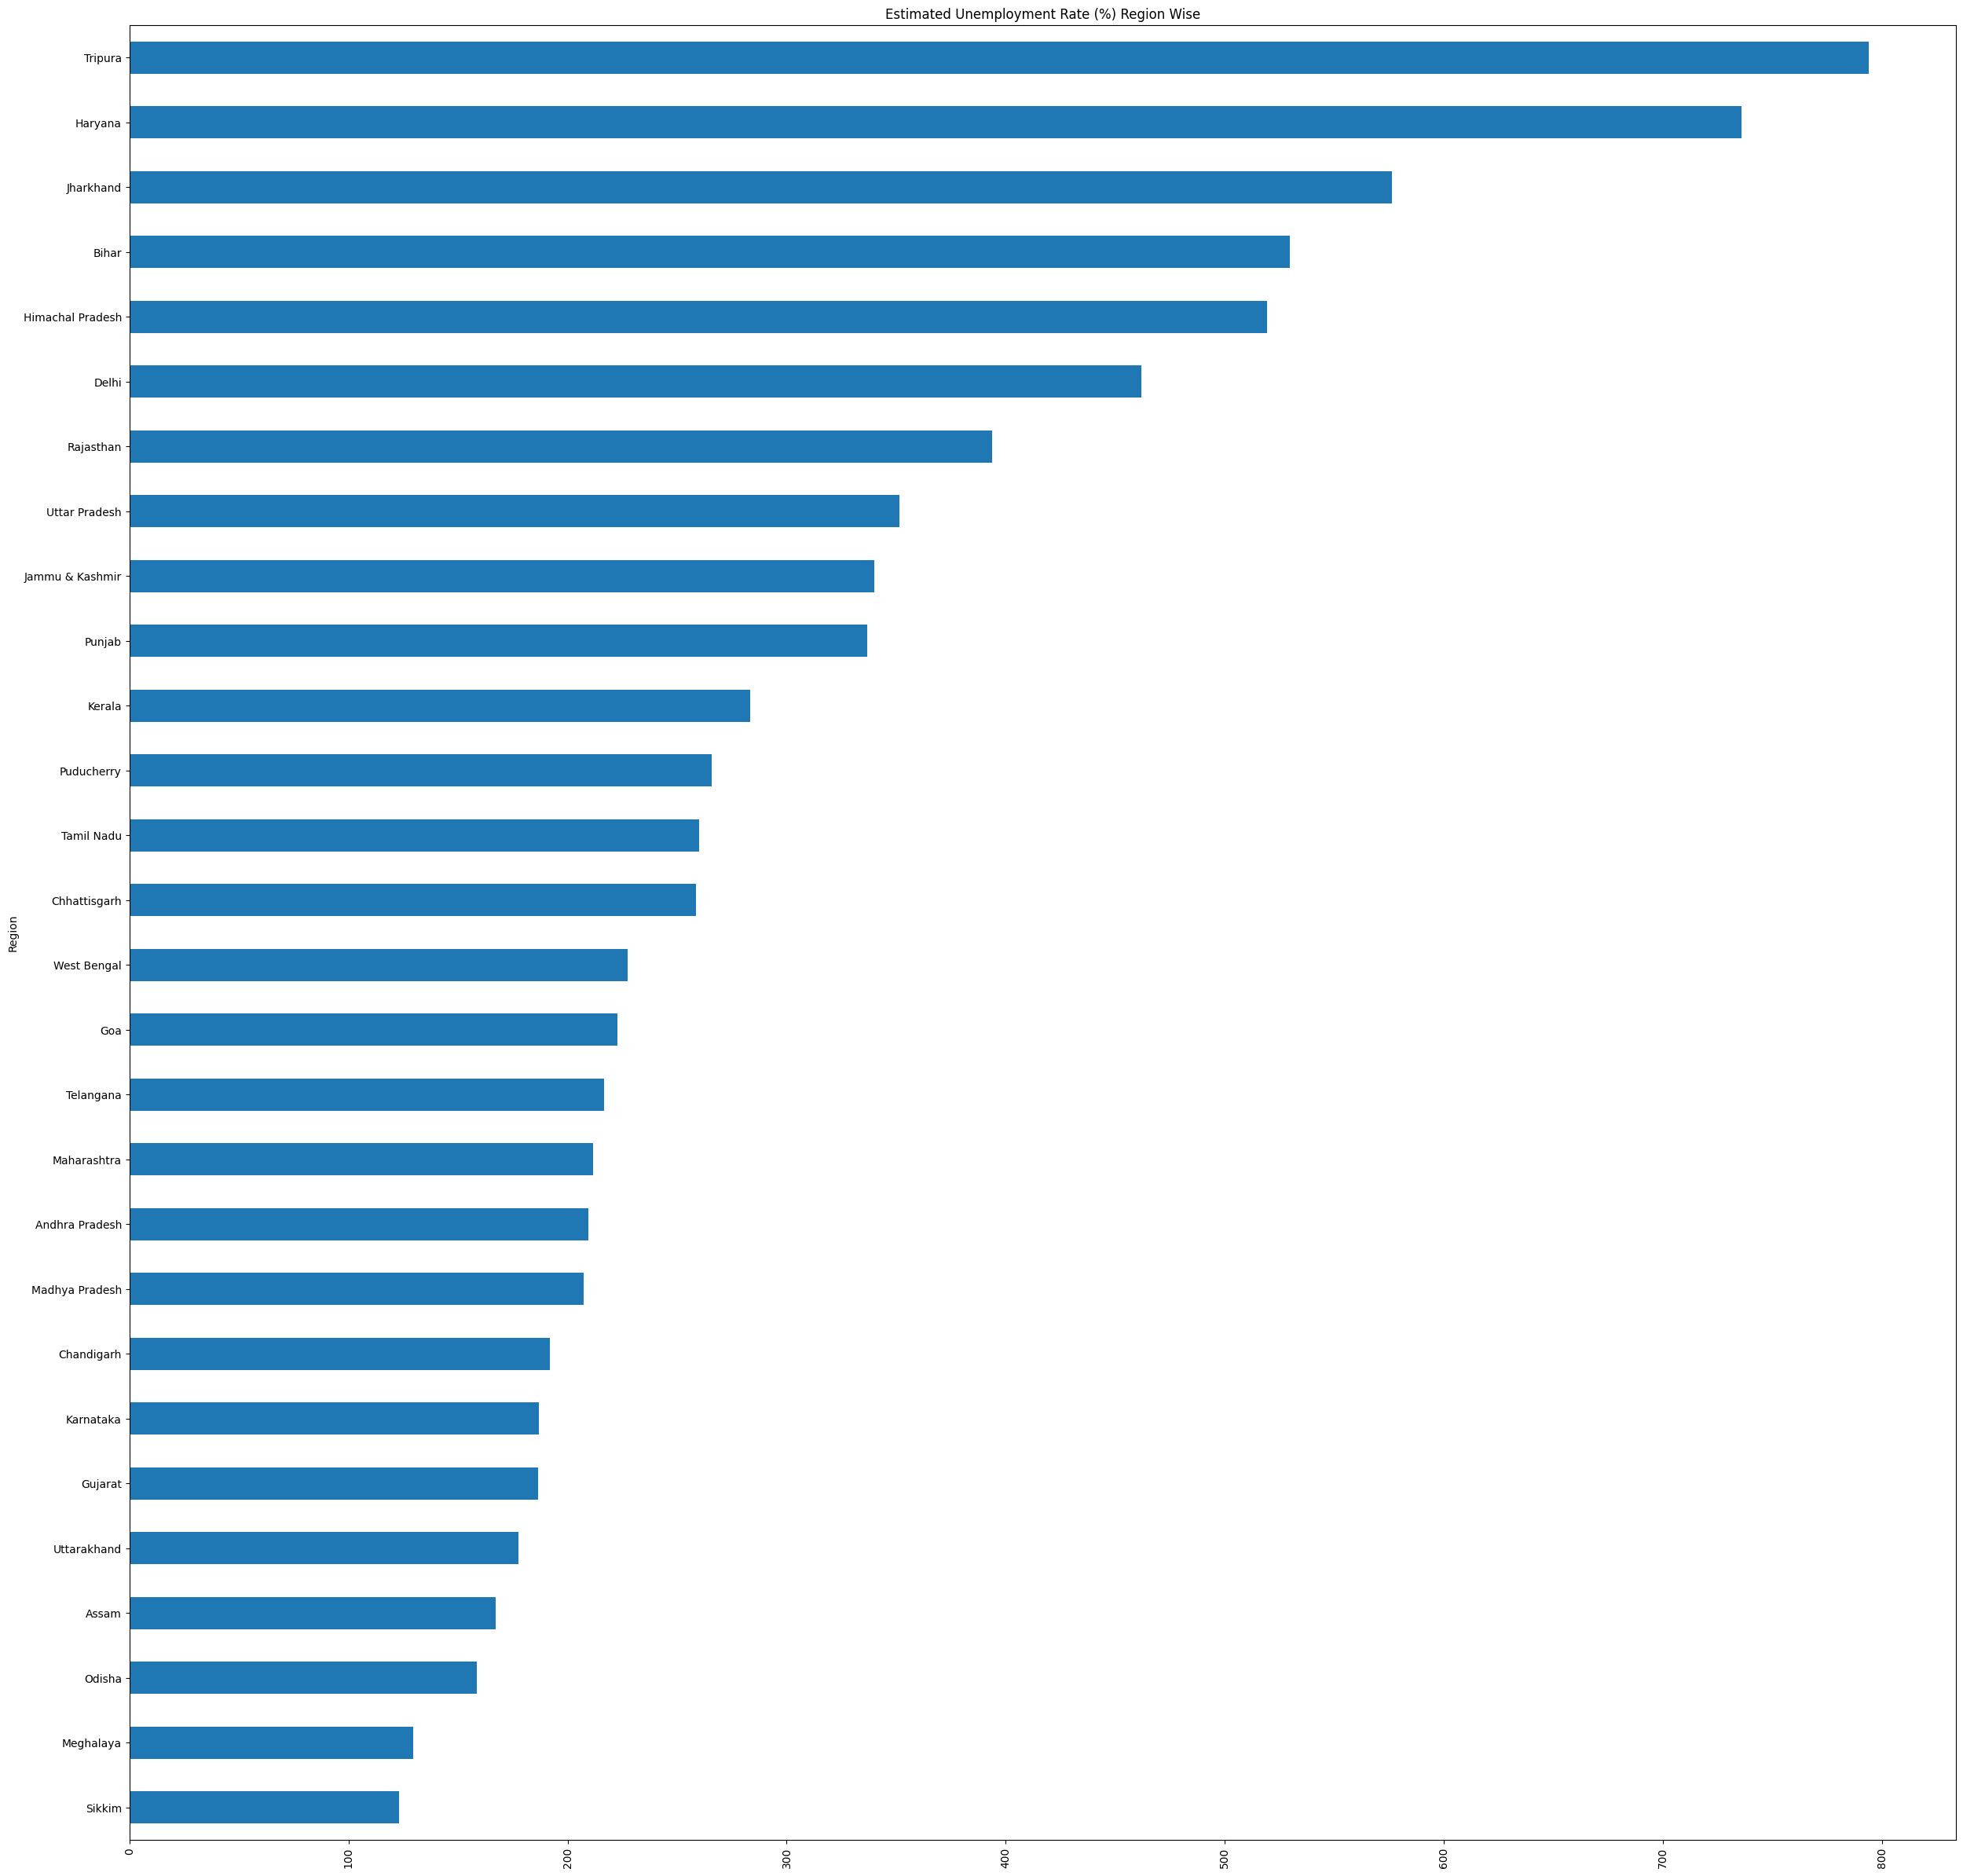

In [134]:
a1=df.groupby(['Region'])['Estimated Unemployment Rate (%)'].sum().sort_values(ascending=True)
plt.figure(figsize=(30,30))
a1.plot(kind='barh')
plt.title('Estimated Unemployment Rate (%) Region Wise')
plt.xticks(rotation=90)
plt.show()

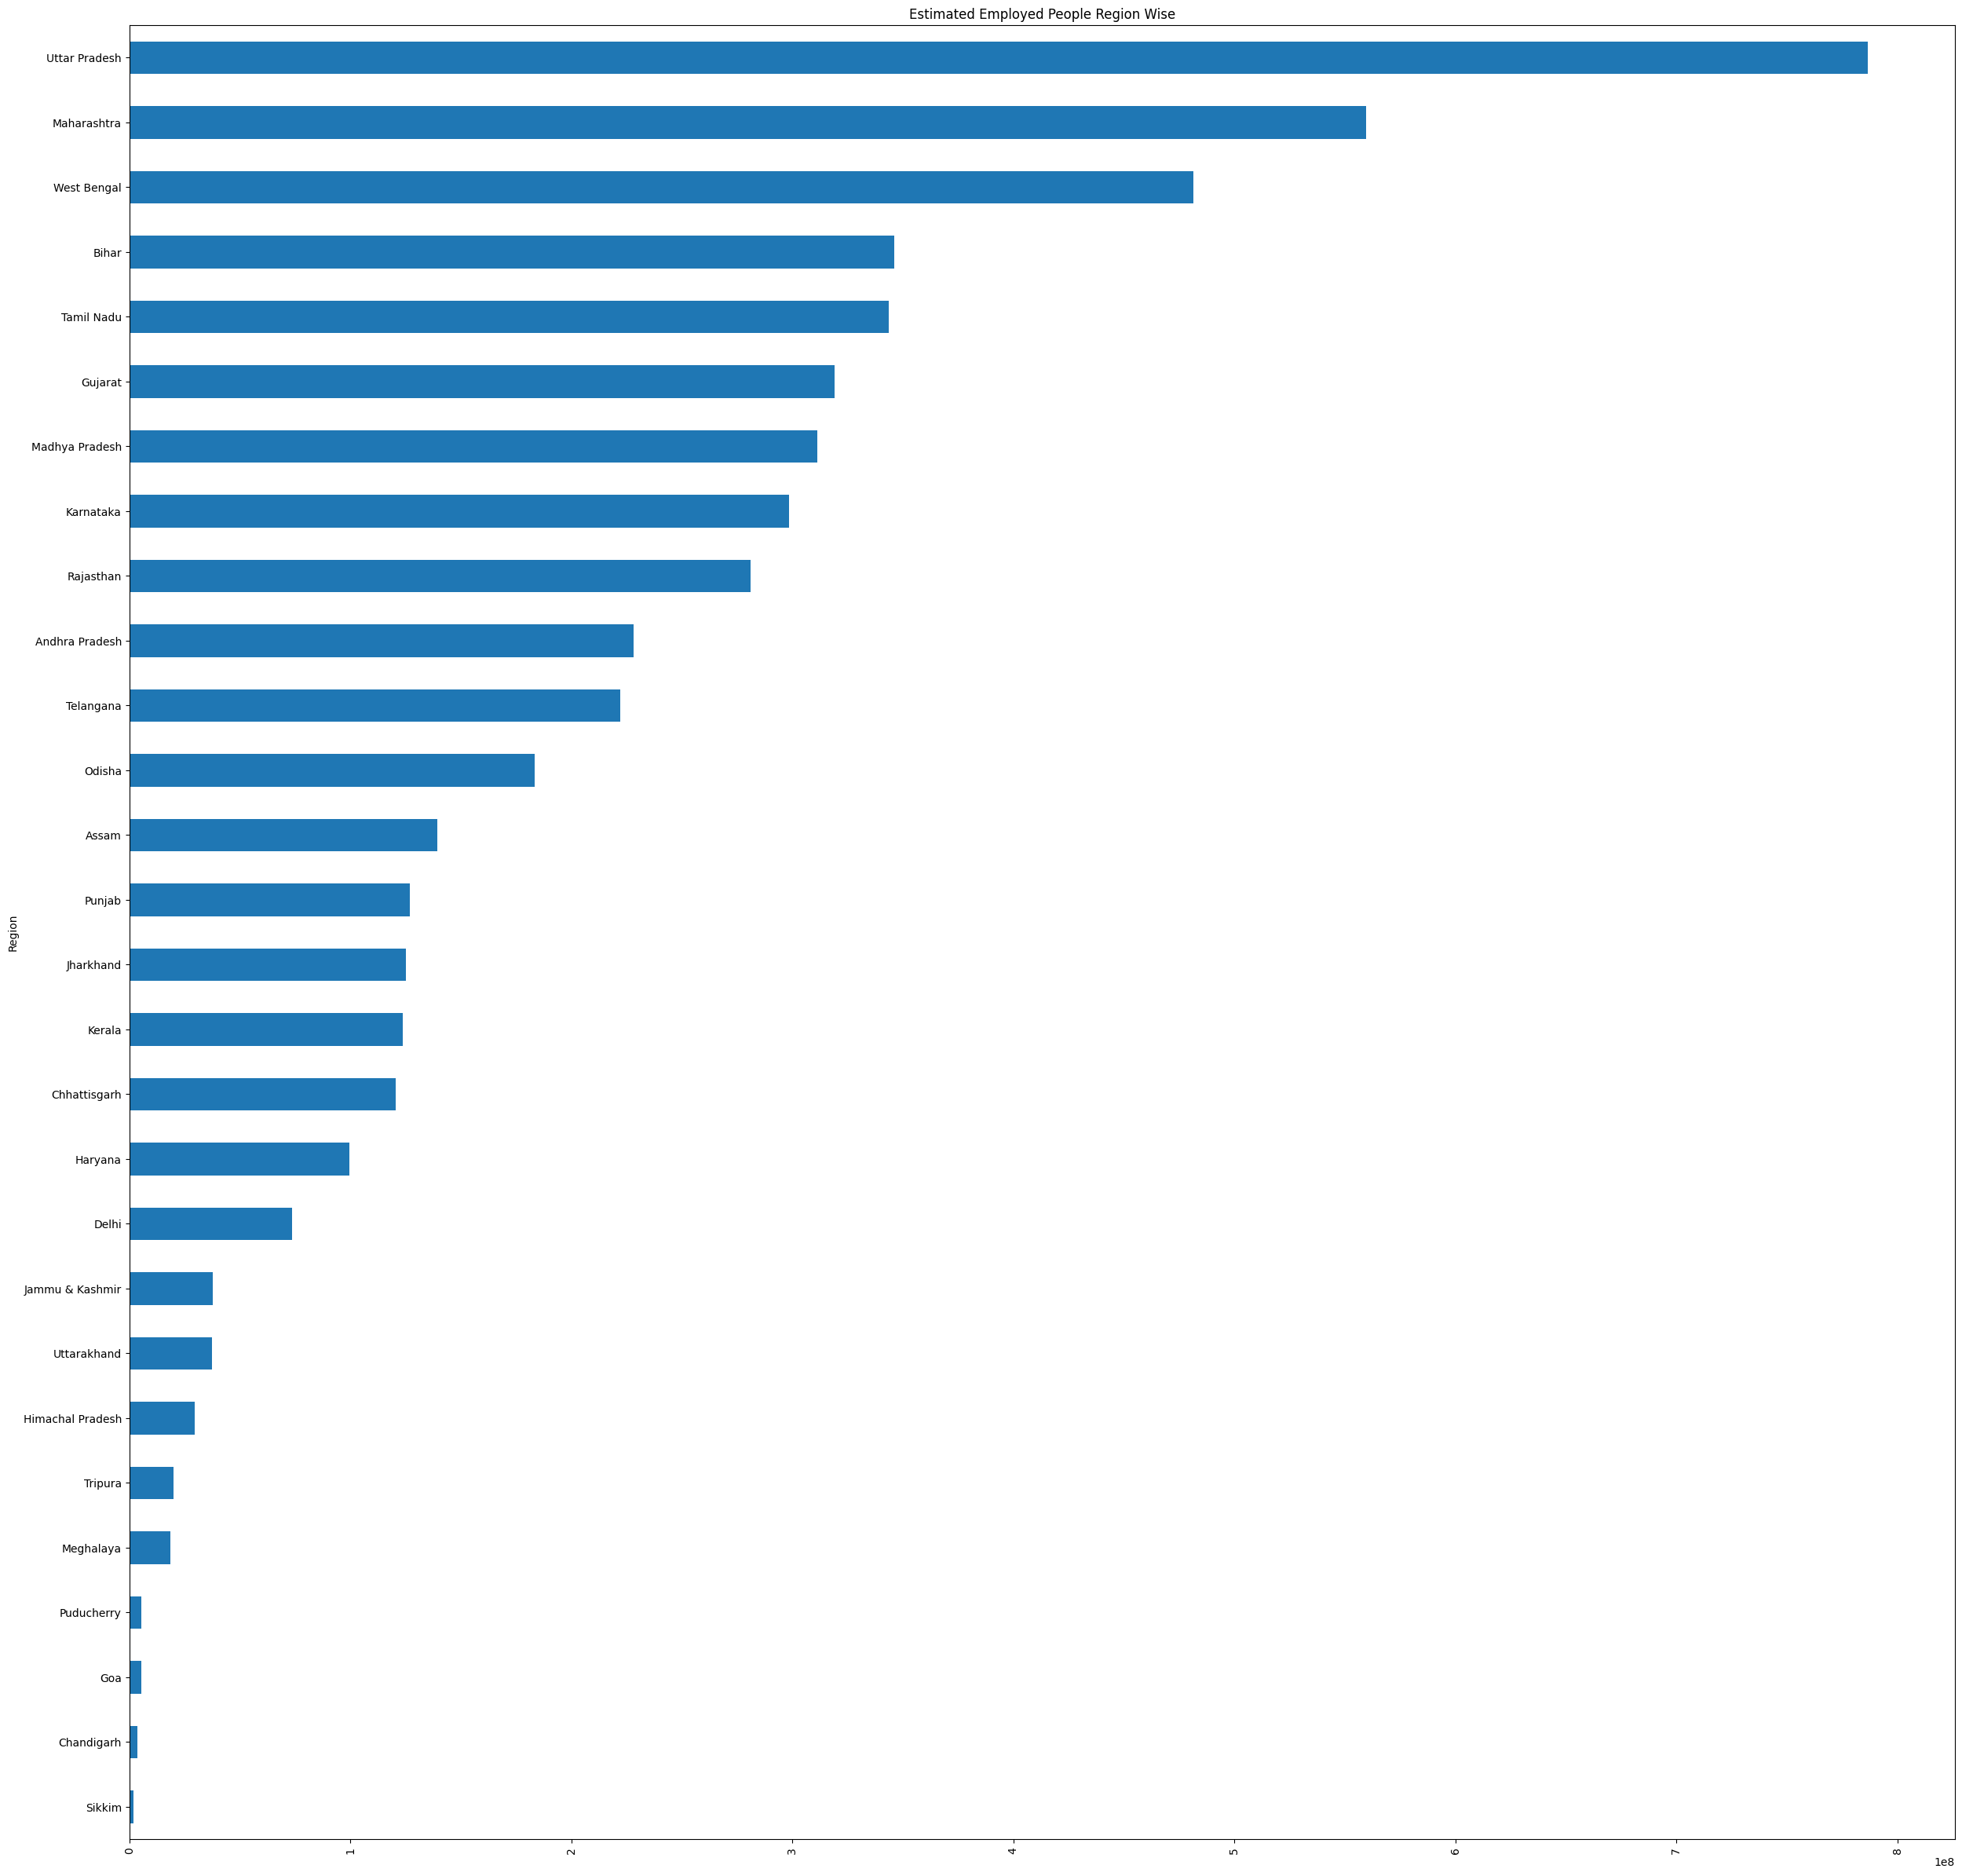

In [135]:
a2=df.groupby(['Region'])['Estimated Employed'].sum().sort_values(ascending=True)
plt.figure(figsize=(30,30))
a2.plot(kind='barh')
plt.title('Estimated Employed People Region Wise')
plt.xticks(rotation=90)
plt.show()

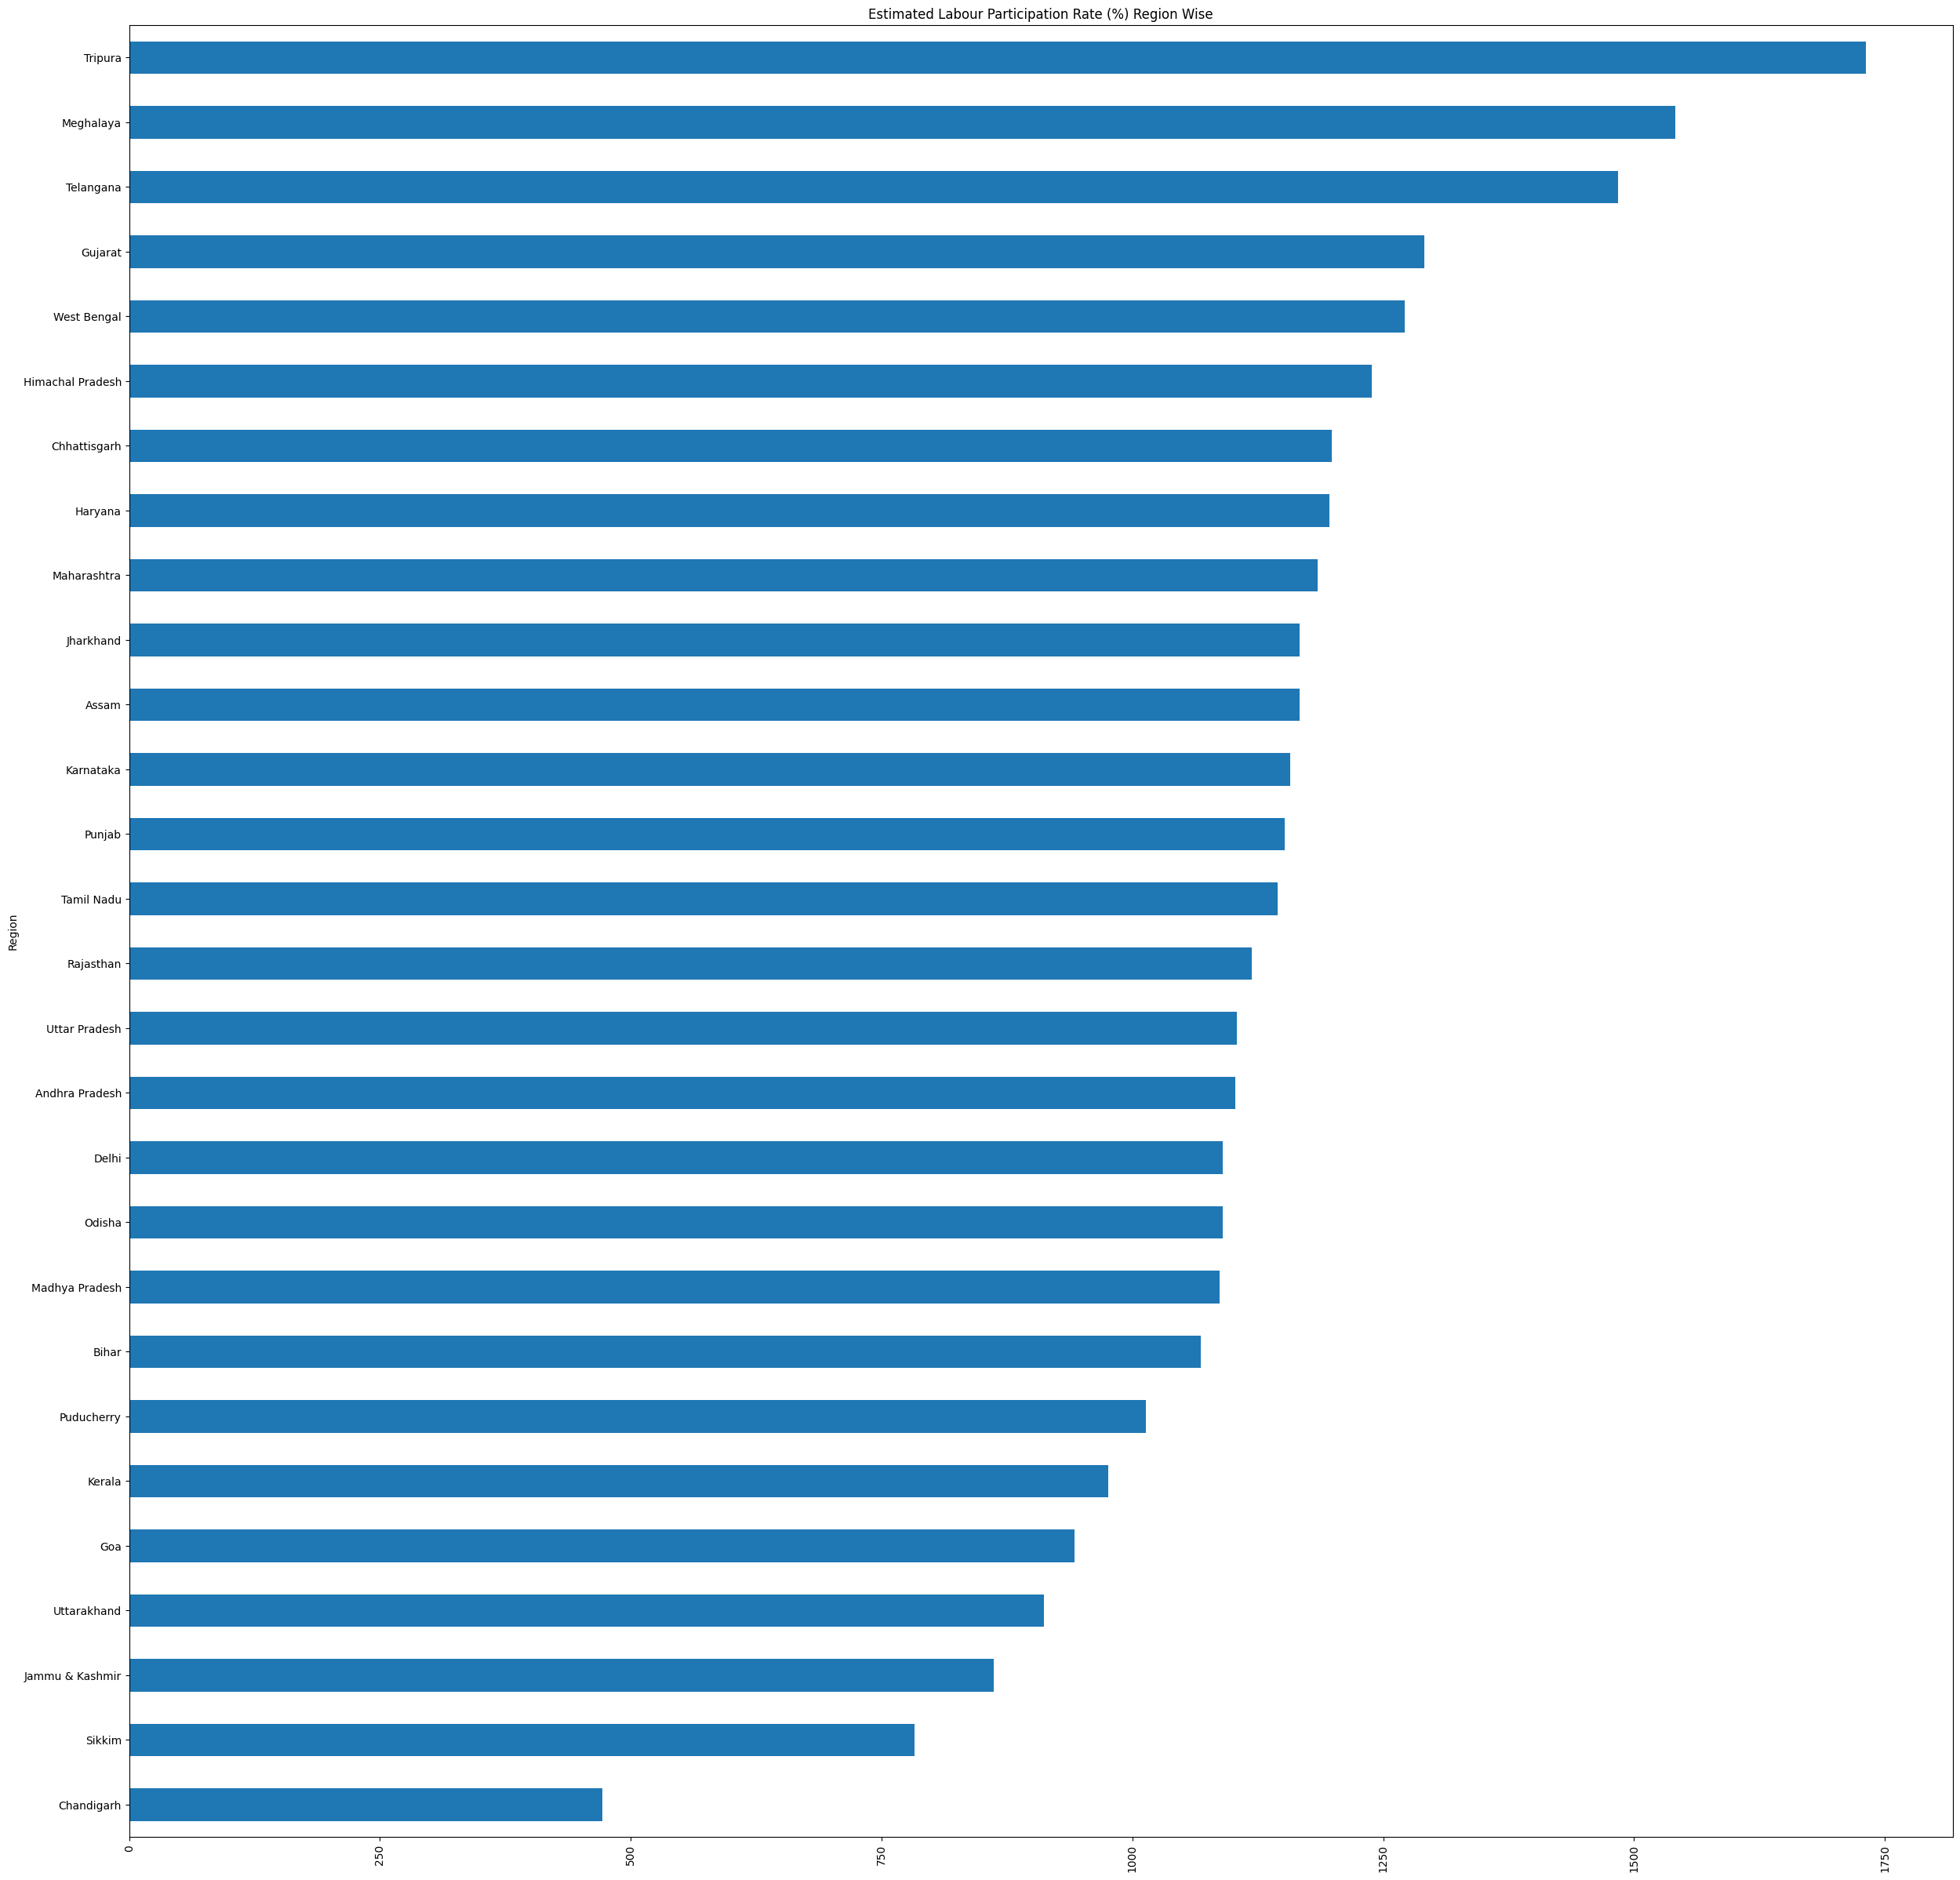

In [136]:
a3=df.groupby(['Region'])['Estimated Labour Participation Rate (%)'].sum().sort_values(ascending=True)
plt.figure(figsize=(30,30))
a3.plot(kind='barh')
plt.title('Estimated Labour Participation Rate (%) Region Wise')
plt.xticks(rotation=90)
plt.show()

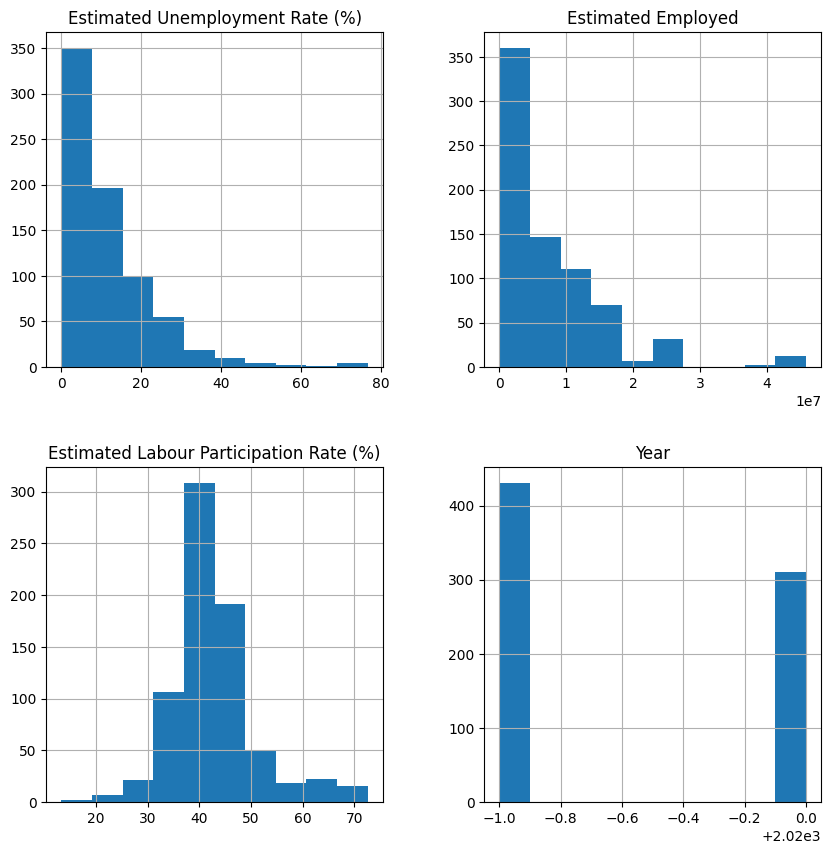

In [137]:
df.hist(figsize=(10,10))
plt.show()

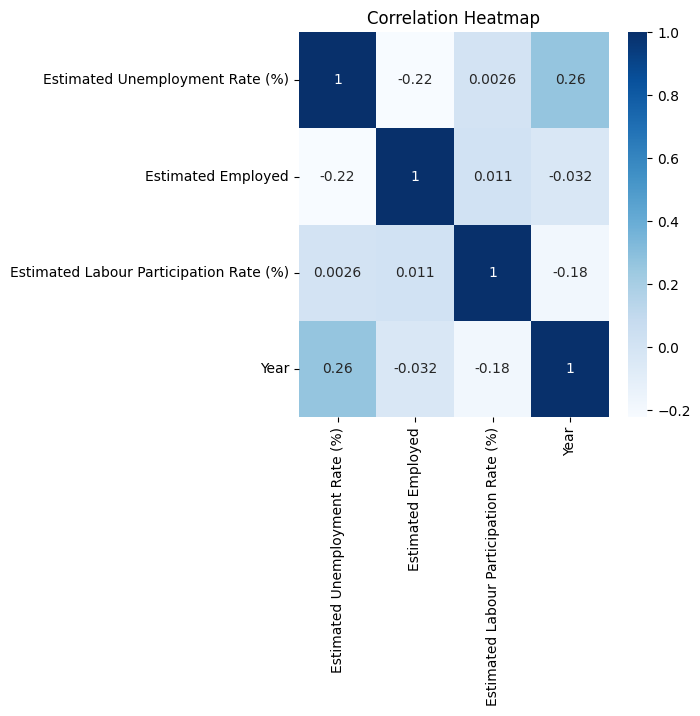

In [138]:
data = df[['Estimated Unemployment Rate (%)','Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Year']]
corr_matrix = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

Gathering Insights:
1. Urban area has the highest Unemployment Rate.
2. Rural area has the highest Labour Participation Rate.
3. Rural area has the highest Estimated Employed People.
4. In 2019 there is highest Unemployment level.
5. Chandigarh is having the lowest Unemployment level.
6. Tripura is having theHighest Estimated Unemployment Rate (%).
7. Uttar Pradesh is having the Highest Estimated Employed People.
8. Tripura is having the Highest Estimated Labour Participation Rate.

### Unemployment Rate upto 11_2020 Dataset
#### Data profiling

In [140]:
df1 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [141]:
df1.columns = df1.columns.str.strip()
df1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [142]:
df1.nunique().sort_values()

Frequency                                    1
Region.1                                     5
Date                                        10
latitude                                    24
Region                                      27
longitude                                   27
Estimated Labour Participation Rate (%)    248
Estimated Unemployment Rate (%)            252
Estimated Employed                         267
dtype: int64

In [143]:
df1['Frequency'].unique()

array([' M'], dtype=object)

In [144]:
df1['Region.1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [145]:
df1['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

#### Data Cleaning

In [146]:
df1.duplicated().sum()

0

In [147]:
df1.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

In [148]:
df1['Frequency'].replace(' M','M',inplace=True)
df1['Frequency'].value_counts()

Frequency
M    267
Name: count, dtype: int64

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [150]:
df1['Date']=pd.to_datetime(df1['Date'])
df1.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Region.1                                           object
longitude                                         float64
latitude                                          float64
dtype: object

In [151]:
df1['Year']=df1['Date'].dt.year
df1['Month']=df1['Date'].dt.month
df1['Day']=df1['Date'].dt.day
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Year,Month,Day
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,2020,1,31
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2020,2,29
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,2020,3,31
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,2020,4,30
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,2020,5,31


In [152]:
df1.nunique().sort_values()

Frequency                                    1
Year                                         1
Day                                          3
Region.1                                     5
Date                                        10
Month                                       10
latitude                                    24
Region                                      27
longitude                                   27
Estimated Labour Participation Rate (%)    248
Estimated Unemployment Rate (%)            252
Estimated Employed                         267
dtype: int64

In [153]:
df1.drop(['Date','Frequency','Year'],axis = 1, inplace=True)
df1.columns

Index(['Region', 'Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude',
       'latitude', 'Month', 'Day'],
      dtype='object')

In [154]:
cat_cols = df1.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df1.select_dtypes(exclude='object').columns
print(num_cols)

Index(['Region', 'Region.1'], dtype='object')
Index(['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'longitude', 'latitude',
       'Month', 'Day'],
      dtype='object')


#### Data Visualization

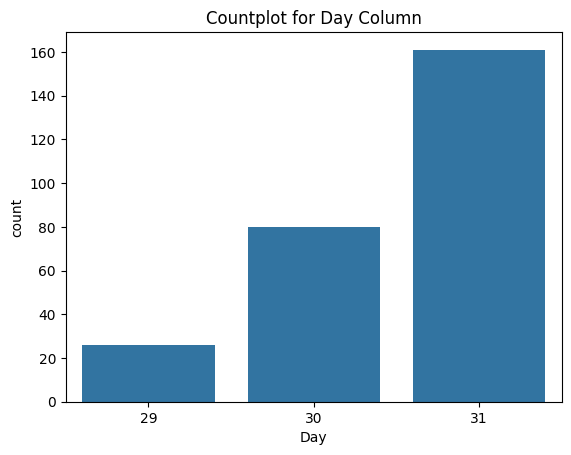

In [155]:
sns.countplot(data=df1,x='Day')
plt.title('Countplot for Day Column')
plt.show()

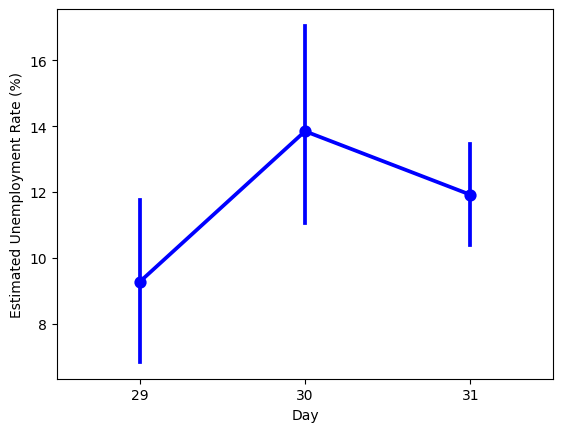

In [156]:
sns.pointplot(data=df1,x='Day',y='Estimated Unemployment Rate (%)',color='blue')
plt.show()

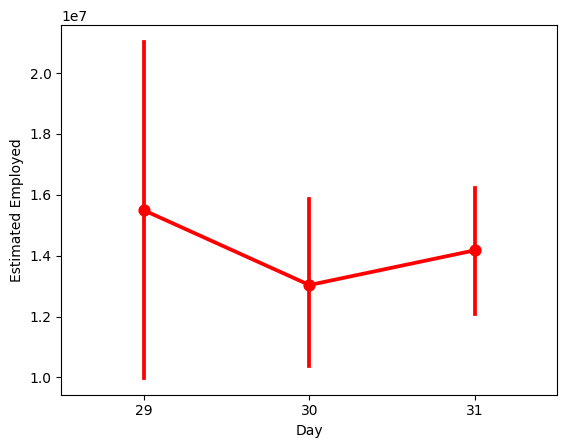

In [157]:
sns.pointplot(data=df1,x='Day',y='Estimated Employed',color='red')
plt.show()

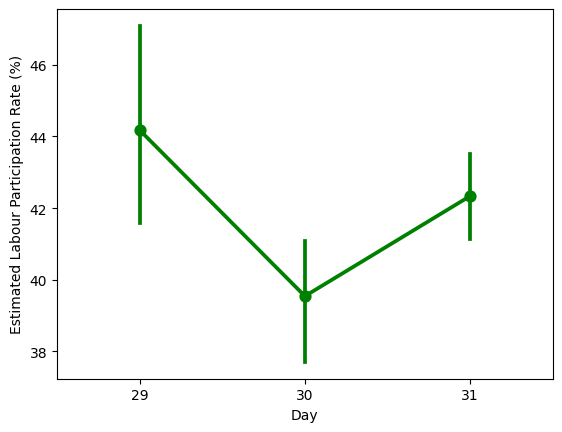

In [158]:
sns.pointplot(data=df1,x='Day',y='Estimated Labour Participation Rate (%)',color='green')
plt.show()

In [159]:
r1 = df1['Region.1'].value_counts()
r1

Region.1
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64

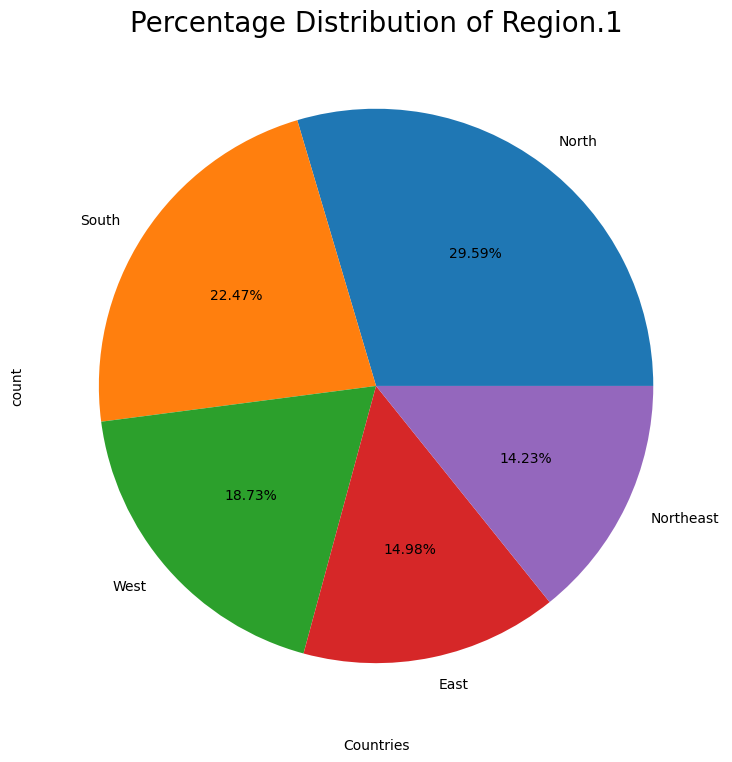

In [160]:
plt.figure(figsize=(10,9))
r1.plot(kind='pie',autopct = '%.2f%%')
plt.title("Percentage Distribution of Region.1", fontsize=20)
plt.xlabel('Countries')
plt.show()

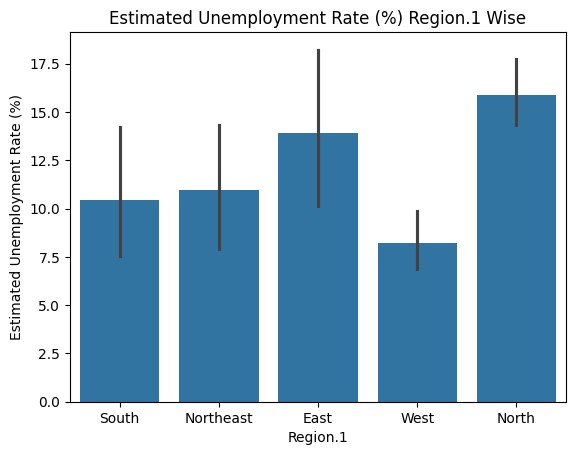

In [161]:
sns.barplot(data=df1,x='Region.1',y='Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate (%) Region.1 Wise')
plt.show()

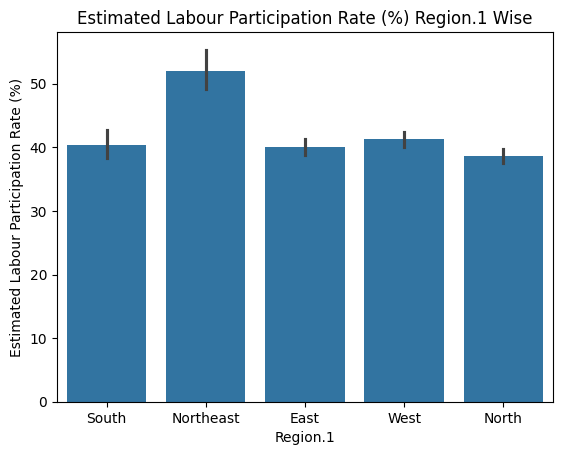

In [162]:
sns.barplot(data=df1,x='Region.1',y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%) Region.1 Wise')
plt.show()

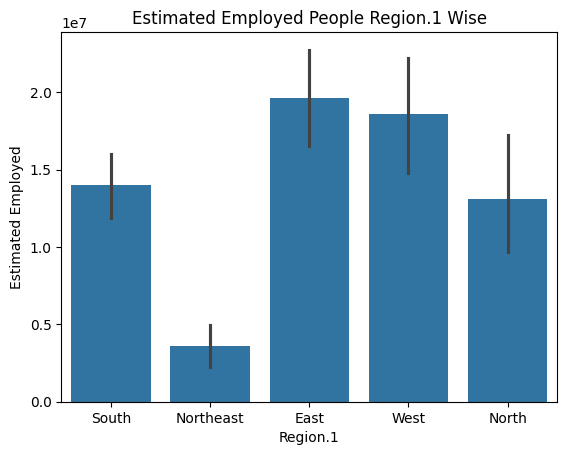

In [163]:
sns.barplot(data=df1,x='Region.1',y='Estimated Employed')
plt.title('Estimated Employed People Region.1 Wise')
plt.show()

In [164]:
df1['Month'].value_counts()

Month
3     27
5     27
6     27
7     27
8     27
9     27
10    27
1     26
2     26
4     26
Name: count, dtype: int64

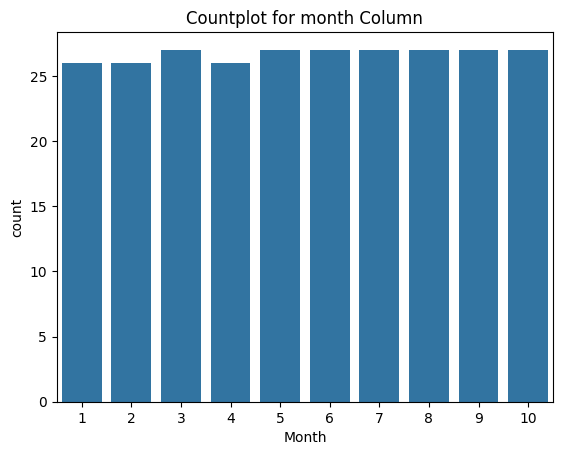

In [165]:
sns.countplot(data=df1,x='Month')
plt.title('Countplot for month Column')
plt.show()

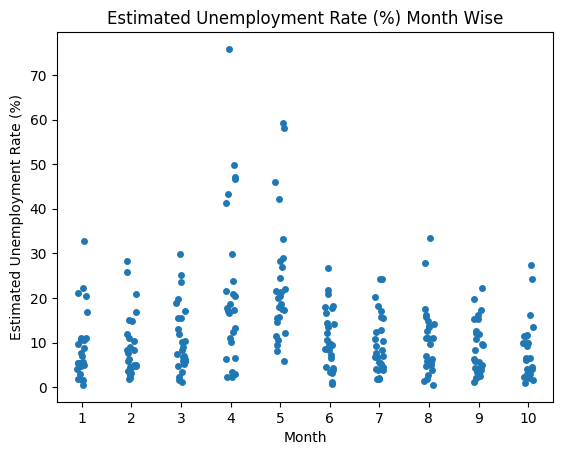

In [166]:
sns.stripplot(data=df1,x='Month',y='Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate (%) Month Wise')
plt.show()

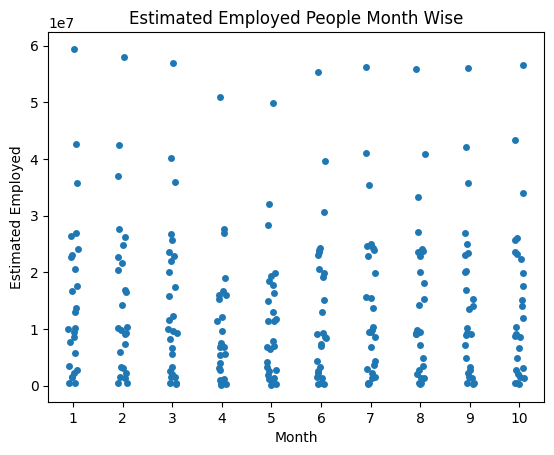

In [167]:
sns.stripplot(data=df1,x='Month',y='Estimated Employed')
plt.title('Estimated Employed People Month Wise')
plt.show()

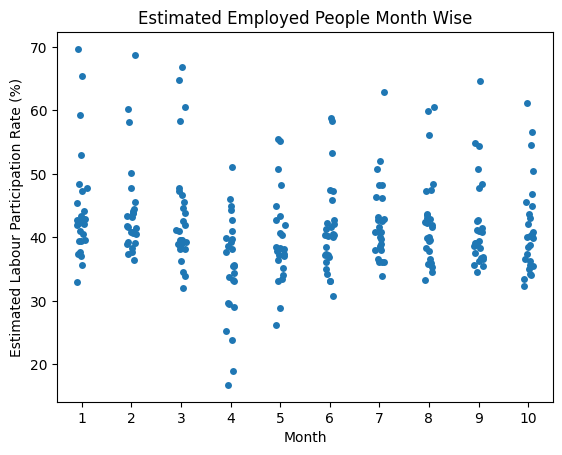

In [168]:
sns.stripplot(data=df1,x='Month',y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Employed People Month Wise')
plt.show()

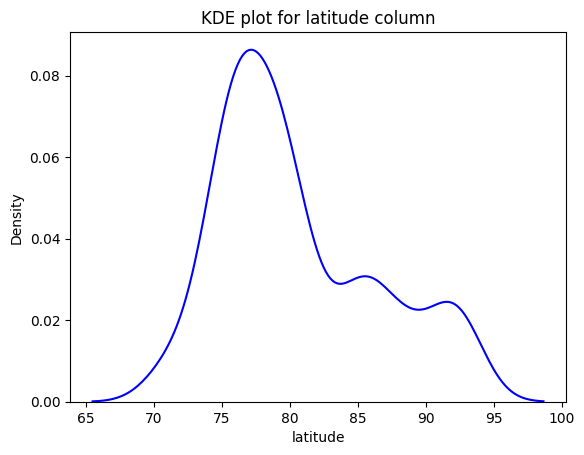

In [169]:
sns.kdeplot(x=df1["latitude"],color="blue")
plt.title("KDE plot for latitude column")
plt.show()

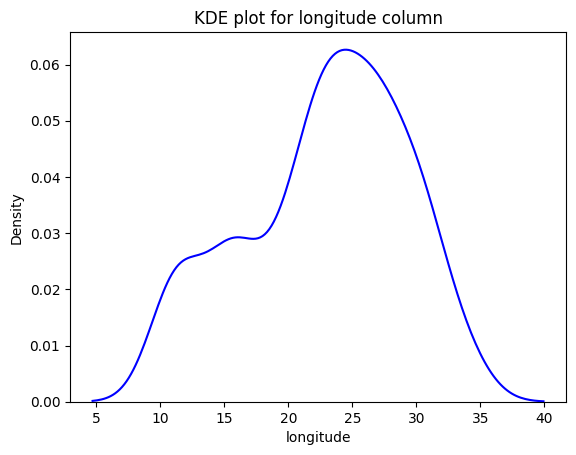

In [170]:
sns.kdeplot(x=df1["longitude"],color="blue")
plt.title("KDE plot for longitude column")
plt.show()

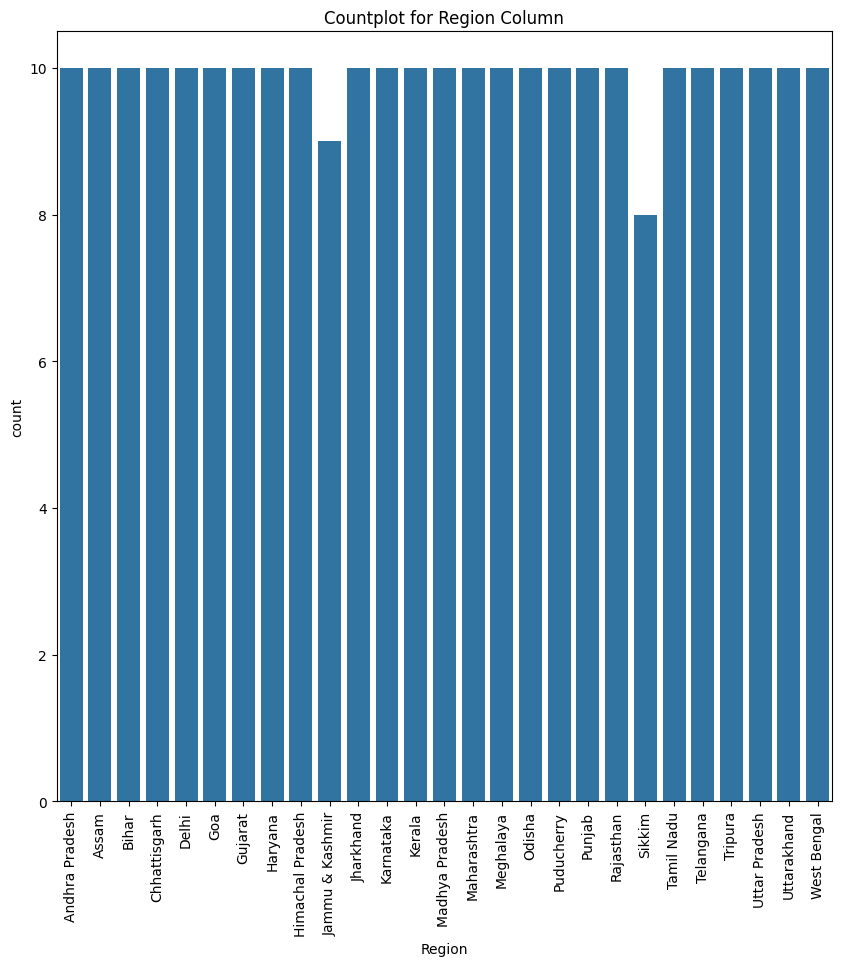

In [171]:
plt.figure(figsize=(10,10))
sns.countplot(data=df1,x='Region')
plt.title('Countplot for Region Column')
plt.xticks(rotation=90)
plt.show()

Sikkim and Jammu Kashmir have lowest Unemployment level.

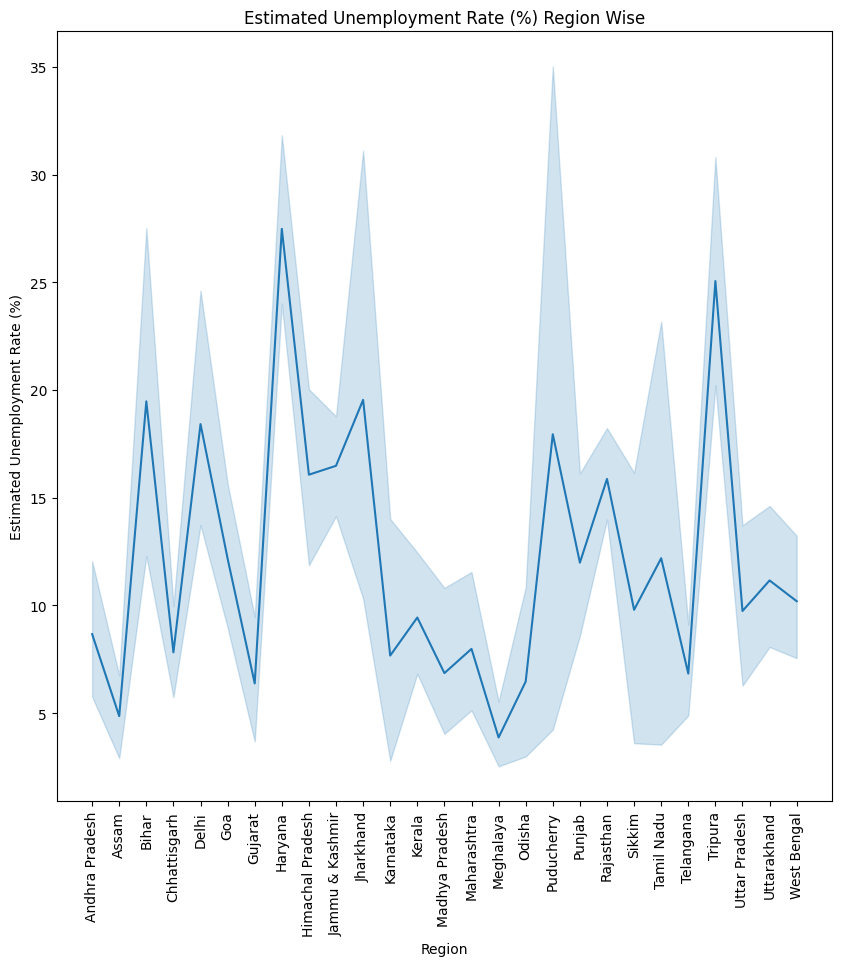

In [172]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1,x='Region',y='Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate (%) Region Wise')
plt.xticks(rotation=90)
plt.show()

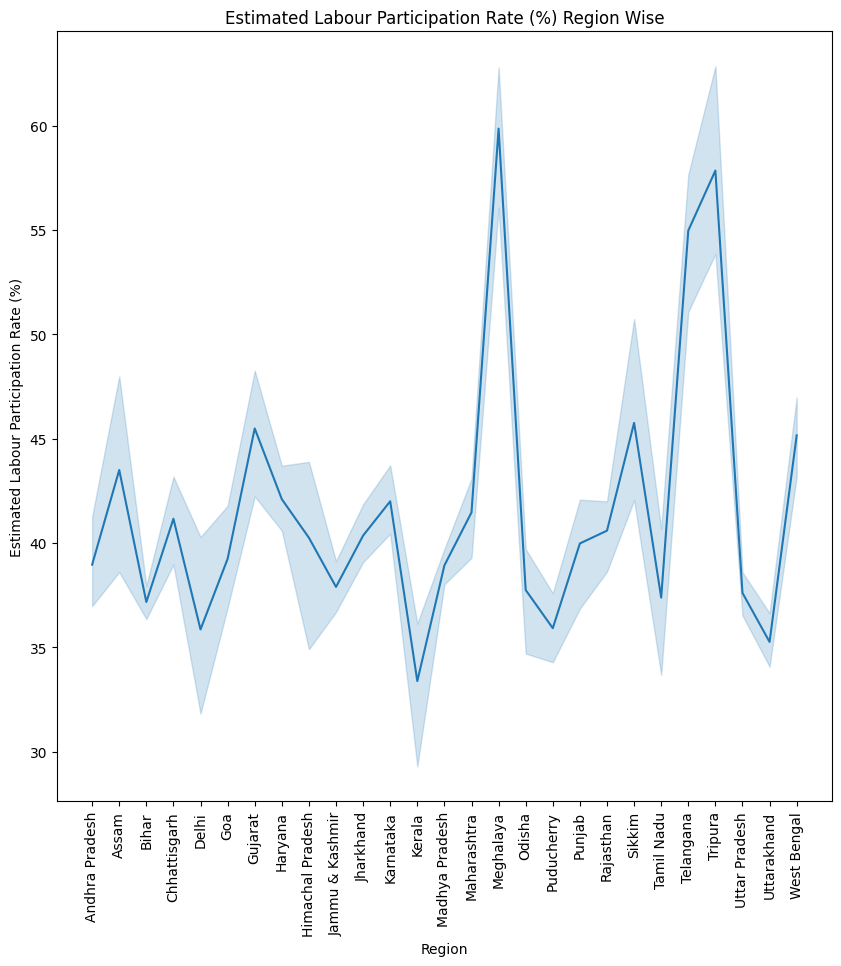

In [173]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1,x='Region',y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%) Region Wise')
plt.xticks(rotation=90)
plt.show()

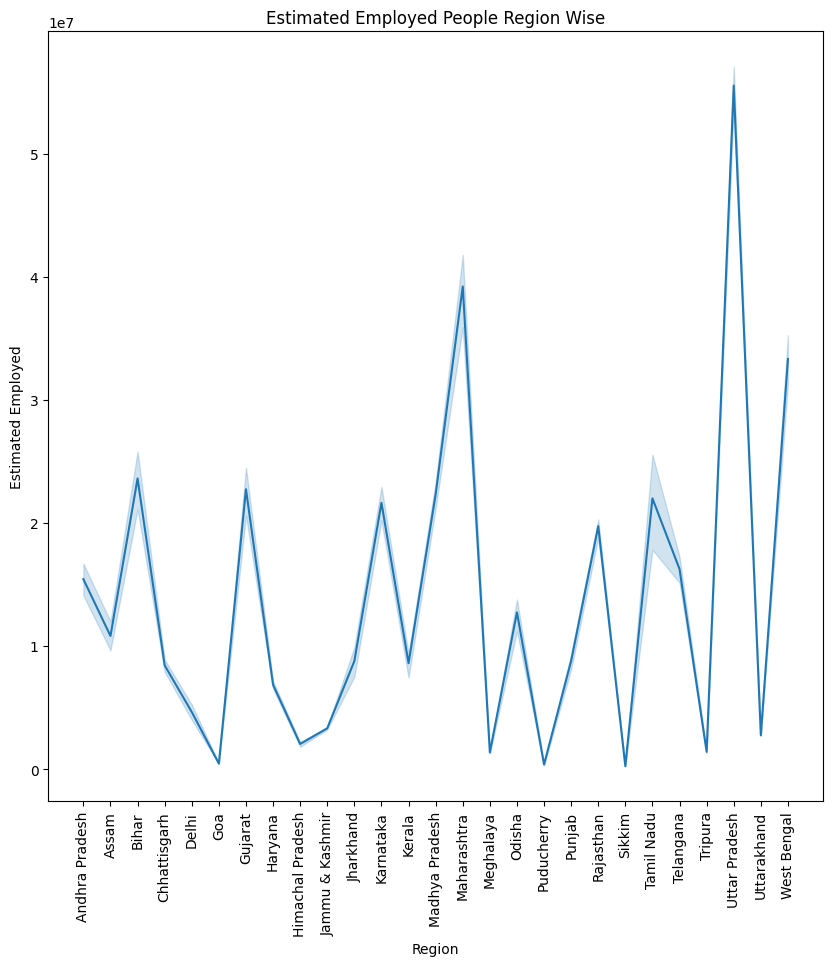

In [174]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1,x='Region',y='Estimated Employed')
plt.title('Estimated Employed People Region Wise')
plt.xticks(rotation=90)
plt.show()

In [175]:
df1.columns

Index(['Region', 'Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude',
       'latitude', 'Month', 'Day'],
      dtype='object')

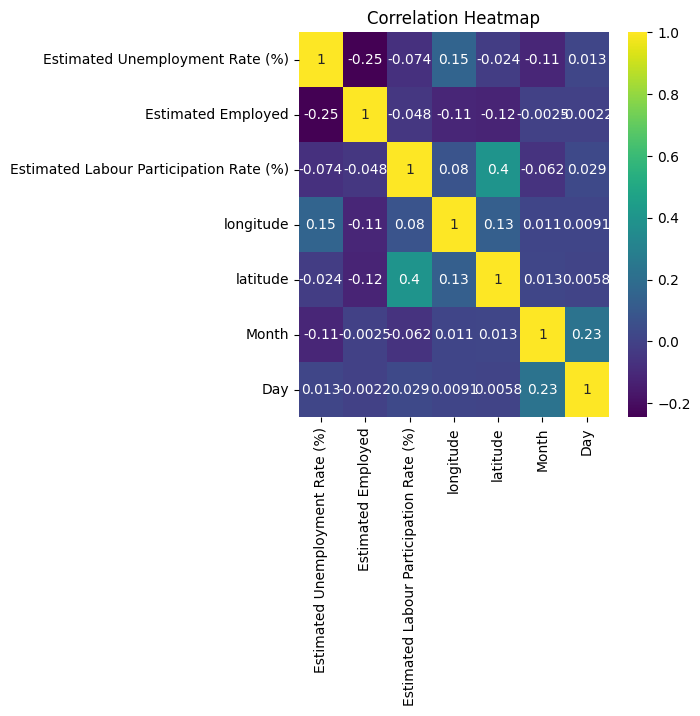

In [176]:
data1 = df1[['Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'longitude',
       'latitude', 'Month', 'Day']]
corr_matrix1 = data1.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix1, annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

Gathering Insights
1. On 30th there is highest unemployment rate
2. On 29th Labour participation rate is highest
3. On 29th there is highest employed people
4. The Highest Unemployment Rate is in North India.
5. Labour Participation Rate is more in Norheast India.
6. Mostly East Indians are Employed.
7. May is having the highest Unemployment Rate.
8. In January , most of the people are employed.
9. April is having the lowest Labour Participation Rate.
10. Haryana has highest Unemployment Rate.
11. Labour Participation Rate is more in Meghalaya.
12. Employeed People are mostly in Uttar Pradesh.